In [2]:
import time
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: ignored

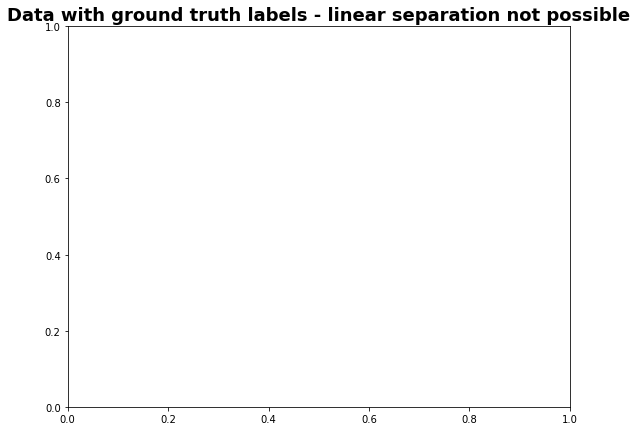

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
feature_columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
dataset =  pd.read_csv(url, names = feature_columns)
X_mn = dataset[feature_columns].values
y_mn = dataset['Class'].values

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=50, cmap='virdis')

In [11]:
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph
A = radius_neighbors_graph(X_mn,0.4,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
A = kneighbors_graph(X_mn, 2, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False)
A = A.toarray()

ValueError: ignored

In [ ]:
A.shape

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('5 first datapoints', fontsize=18, fontweight='demi')
ax.set_xlim(-1, 2)
ax.set_ylim(-1,1)
ax.scatter(X_mn[:5, 0], X_mn[:5, 1],s=dot_size, cmap=cmap)
for i in range(5):
    ax.annotate(i, (X_mn[i,0],X_mn[i,1]))

In [12]:
from scipy.sparse import csgraph
L = csgraph.laplacian(A, normed=False)
L[:5,:5]

NameError: ignored

In [13]:
eigval, eigvec = np.linalg.eig(L)
np.where(eigval == np.partition(eigval, 1)[1])

NameError: ignored

In [ ]:
y_spec =eigvec[:,1].copy()
y_spec[y_spec < 0] = 0
y_spec[y_spec > 0] = 1
type(y_spec),y_mn.shape,y_spec.shape

In [ ]:
(numpy.ndarray, (150,), (150,))
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_spec ,s=dot_size, cmap=cmap)